Deeper look to 'Province' Dataset
There are some redundant and not interesting variables, as well as fake records.

Removing Fake records, remembering Italy is above equator.


In [110]:
d1.shape


(12305, 12)

In [111]:
#Removing fake data
toremove = []
for row in d1.index:
    if d1['lat'][row] == 0:
        toremove.append(row) #saving fake rows
d1 = d1.drop(toremove) #dropping fake rows
d1 = d1.reset_index(drop = True) #updating indexes


In [112]:
d1.shape

(12305, 12)

Let's try to build some more interesting objects, like a MultiIndex DataFrame and a TimeSeries.

In [113]:
MI = d1.set_index(['denominazione_regione', 'sigla_provincia'])
MI.sort_index(inplace = True)


We can drop all attributes and replace them with dates

In [114]:
MI.columns

Index(['codice_provincia', 'codice_regione', 'data', 'denominazione_provincia',
       'lat', 'long', 'note_en', 'note_it', 'stato', 'totale_casi'],
      dtype='object')

In [115]:
to_drop = MI.columns[:4].append( MI.columns[6:])
to_drop

Index(['codice_provincia', 'codice_regione', 'data', 'denominazione_provincia',
       'note_en', 'note_it', 'stato', 'totale_casi'],
      dtype='object')

In [116]:
MI.drop(to_drop, axis = 1, inplace = True)
MI.iloc[25:30]

lat       long
denominazione_regione sigla_provincia                      
Abruzzo               AQ               42.351222  13.398438
                      AQ               42.351222  13.398438
                      AQ               42.351222  13.398438
                      AQ               42.351222  13.398438
                      AQ               42.351222  13.398438

In [117]:
MI.index.duplicated(keep='first')

array([False,  True,  True, ...,  True,  True,  True], dtype=bool)

In [118]:
MI = MI[~MI.index.duplicated(keep='first')]

In [119]:
MI.iloc[25:30]

lat       long
denominazione_regione sigla_provincia                      
Friuli Venezia Giulia GO               45.941498  13.622125
                      PN               45.954435  12.660029
                      TS               45.649435  13.768136
                      UD               46.062555  13.234838
Lazio                 FR               41.639646  13.351172

In [120]:
dates = pd.to_datetime(d1['data'].unique())
dates

DatetimeIndex(['2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27',
               '2020-02-28', '2020-02-29', '2020-03-01', '2020-03-02',
               '2020-03-03', '2020-03-04',
               ...
               '2020-06-08', '2020-06-09', '2020-06-10', '2020-06-11',
               '2020-06-12', '2020-06-13', '2020-06-14', '2020-06-15',
               '2020-06-16', '2020-06-17'],
              dtype='datetime64[ns]', length=115, freq=None)

In [121]:
MI = pd.concat([MI,pd.DataFrame(columns=dates)])

In [149]:
dates[10:12]

DatetimeIndex(['2020-03-05', '2020-03-06'], dtype='datetime64[ns]', freq=None)

In [123]:
MI.iloc[20:30, 10:12]


2020-03-03 00:00:00 2020-03-04 00:00:00
denominazione_regione sigla_provincia                                        
Emilia-Romagna        PC                              NaN                 NaN
                      PR                              NaN                 NaN
                      RA                              NaN                 NaN
                      RE                              NaN                 NaN
                      RN                              NaN                 NaN
Friuli Venezia Giulia GO                              NaN                 NaN
                      PN                              NaN                 NaN
                      TS                              NaN                 NaN
                      UD                              NaN                 NaN
Lazio                 FR                              NaN                 NaN

In [154]:

MI.columns[2:].to_pydatetime()

AttributeError: 'Index' object has no attribute 'to_pydatetime'

In [124]:
MI.loc[('Toscana', 'FI')][dates[80:85]]


2020-05-14    NaN
2020-05-15    NaN
2020-05-16    NaN
2020-05-17    NaN
2020-05-18    NaN
Name: (Toscana, FI), dtype: object

With the objects created, we can define also the TimeSeries, TS:

In [125]:
prov = list(MI.index.get_level_values('sigla_provincia'))
prov[:6]

['AQ', 'CH', 'PE', 'TE', 'MT', 'PZ']

In [129]:
#Creating a TimeSeries
dates_TS = pd.DatetimeIndex(dates)
TS = pd.DataFrame(index = dates_TS, columns = prov)
dailyincr = pd.DataFrame(index = dates_TS[1:], columns =prov) #increment matrix


In [130]:
TS.loc[myTS.index[:5]]


,AQ,CH,PE,TE,MT,PZ,CS,CZ,KR,RC,...,PG,TR,AO,BL,PD,RO,TV,VE,VI,VR
2020-02-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now we have to fill all these DataFrames:

In [147]:
d1.data


0        2020-02-24
1        2020-02-24
2        2020-02-24
3        2020-02-24
4        2020-02-24
5        2020-02-24
6        2020-02-24
7        2020-02-24
8        2020-02-24
9        2020-02-24
10       2020-02-24
11       2020-02-24
12       2020-02-24
13       2020-02-24
14       2020-02-24
15       2020-02-24
16       2020-02-24
17       2020-02-24
18       2020-02-24
19       2020-02-24
20       2020-02-24
21       2020-02-24
22       2020-02-24
23       2020-02-24
24       2020-02-24
25       2020-02-24
26       2020-02-24
27       2020-02-24
28       2020-02-24
29       2020-02-24
            ...    
12275    2020-06-17
12276    2020-06-17
12277    2020-06-17
12278    2020-06-17
12279    2020-06-17
12280    2020-06-17
12281    2020-06-17
12282    2020-06-17
12283    2020-06-17
12284    2020-06-17
12285    2020-06-17
12286    2020-06-17
12287    2020-06-17
12288    2020-06-17
12289    2020-06-17
12290    2020-06-17
12291    2020-06-17
12292    2020-06-17
12293    2020-06-17


In [148]:
MI.columns 

Index([              'lat',              'long', 2020-02-24 00:00:00,
       2020-02-25 00:00:00, 2020-02-26 00:00:00, 2020-02-27 00:00:00,
       2020-02-28 00:00:00, 2020-02-29 00:00:00, 2020-03-01 00:00:00,
       2020-03-02 00:00:00,
       ...
       2020-06-08 00:00:00, 2020-06-09 00:00:00, 2020-06-10 00:00:00,
       2020-06-11 00:00:00, 2020-06-12 00:00:00, 2020-06-13 00:00:00,
       2020-06-14 00:00:00, 2020-06-15 00:00:00, 2020-06-16 00:00:00,
       2020-06-17 00:00:00],
      dtype='object', length=117)

In [140]:
for r in d1.index:
    TS[d1['sigla_provincia'][r]][d1['data'][r]] = d1['totale_casi'][r]
    MI[d1['data'][r]][(d1['denominazione_regione'][r], d1['sigla_provincia'][r])] = d1['totale_casi'][r]

for i in range(1,len(TS)):
    dailyincr.values[i-1] = TS.values[i] - TS.values[i-1]


KeyError: datetime.date(2020, 2, 24)

In [14]:
MI.loc['Calabria']


,lat,long,2020-02-24T18:00:00,2020-02-25T18:00:00,2020-02-26T18:00:00,2020-02-27T18:00:00,2020-02-28T18:00:00,2020-02-29T17:00:00,2020-03-01T17:00:00,2020-03-02T17:00:00,...,2020-06-08T17:00:00,2020-06-09T17:00:00,2020-06-10T17:00:00,2020-06-11T17:00:00,2020-06-12T17:00:00,2020-06-13T17:00:00,2020-06-14T17:00:00,2020-06-15T17:00:00,2020-06-16T17:00:00,2020-06-17T17:00:00
province,,,,,,,,,,,,,,,,,,,,,
CS,39.293087,16.256097,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,468.0,468.0,468.0,468.0,468.0,468.0,468.0,468.0,468.0,468.0
CZ,38.905976,16.594402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,214.0,214.0,214.0,214.0,214.0,214.0,214.0,214.0,214.0,214.0
KR,39.080369,17.125389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,118.0,118.0,118.0,118.0,118.0,118.0,118.0,118.0,118.0,118.0
RC,38.109228,15.643453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,276.0,276.0,276.0,277.0,277.0,277.0,277.0,277.0,277.0,277.0
VV,38.676241,16.101574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,81.0,81.0,81.0,82.0,82.0,83.0,83.0,83.0,83.0,83.0


In [13]:
TS.values


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 7, 0, 0],
       [0, 0, 0, ..., 8, 0, 0],
       ..., 
       [828, 247, 1539, ..., 2678, 5110, 2855],
       [828, 247, 1540, ..., 2678, 5112, 2855],
       [829, 246, 1541, ..., 2679, 5113, 2855]], dtype=object)

In [15]:
dailyincr.values


array([[0, 0, 0, ..., 7, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 6, 0, 3],
       ..., 
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 2, 0],
       [1, -1, 1, ..., 1, 1, 0]], dtype=object)

Now we can do some operations on data exploting MultiIndex object

In [16]:
#Total cases by region at 2020-03-15T17:00:00
MI.groupby('regioni')[dates[20]].sum()

regioni
Abruzzo                    137.0
Basilicata                  11.0
Calabria                    68.0
Campania                   323.0
Emilia-Romagna            3093.0
Friuli Venezia Giulia      342.0
Lazio                      430.0
Liguria                    508.0
Lombardia                12896.0
Marche                    1123.0
Molise                      17.0
P.A. Bolzano               204.0
P.A. Trento                378.0
Piemonte                   969.0
Puglia                     230.0
Sardegna                    77.0
Sicilia                    188.0
Toscana                    781.0
Umbria                     143.0
Valle d'Aosta               57.0
Veneto                    2078.0
Name: 2020-03-15T17:00:00, dtype: float64

In [17]:
#Creating three areas based on Napoli and Bologna latitudes
area = pd.cut(MI['lat'], 
              [ min(MI['lat']), MI.loc[('Campania', 'NA')]['lat'], 
              MI.loc[('Emilia-Romagna', 'BO')]['lat'], max(MI['lat'])],
               include_lowest = True, 
               labels = ['Sud', 'Centro', 'Nord'])


In [19]:
area.loc['Emilia-Romagna']

province
BO    Centro
FC    Centro
FE      Nord
MO      Nord
PC      Nord
PR      Nord
RA    Centro
RE      Nord
RN    Centro
Name: lat, dtype: category
Categories (3, object): [Sud < Centro < Nord]

In [20]:
#Totale cases by geographic area at 2020-03-15T17:00:00
MI.groupby(area)[dates[20]].sum()


lat
Sud         669.0
Centro     4261.0
Nord      19123.0
Name: 2020-03-15T17:00:00, dtype: float64

We can do some visualizations exploiting the Time Series

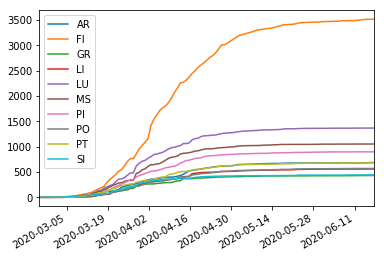

In [27]:
%matplotlib inline

TS[list(myMI.loc['Toscana'].index)].plot()

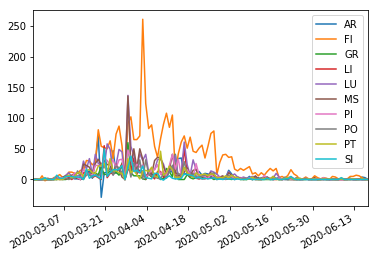

In [30]:
dailyincr[list(myMI.loc['Toscana'].index)].plot()

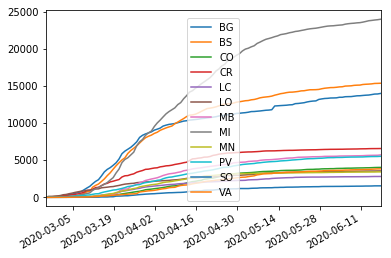

In [28]:
TS[list(MI.loc['Lombardia'].index)].plot()


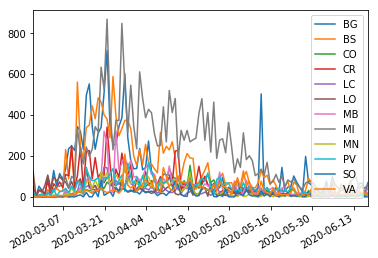

In [31]:
dailyincr[list(MI.loc['Lombardia'].index)].plot()


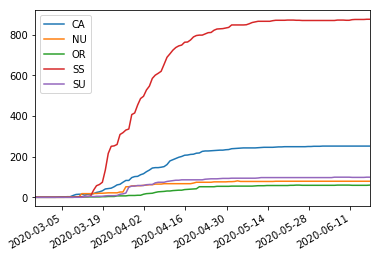

In [29]:
TS[list(MI.loc['Sardegna'].index)].plot()


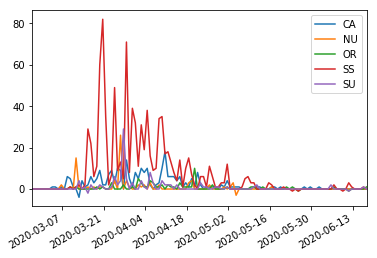

In [32]:
dailyincr[list(MI.loc['Sardegna'].index)].plot()


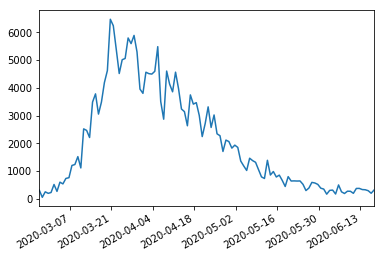

In [33]:
#Daily increase for Italy
dailyincr.sum(axis = 1).plot()

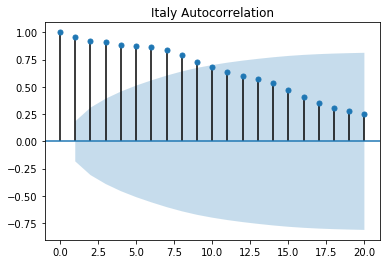

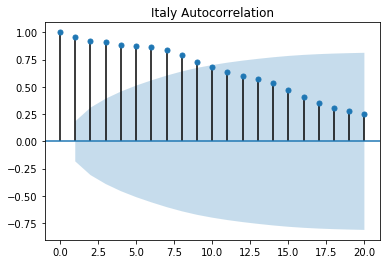

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#ACF plot for totals
plot_acf(dailyincr.sum(axis = 1), lags=20, unbiased = True, title = 'Italy Autocorrelation')

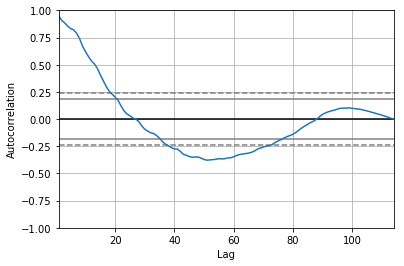

In [2]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(dailyincr.sum(axis = 1))
#dashed 99%, continous 95%


Deeper look to Regioni dataset; there are no fake data this time.
We can try to build a MultiIndex DataFrame with indices (data, regions).

In [157]:
with open('G:/Algoritmi e programmazione/Progetto/Dati/dpc-covid19-ita-regioni.json') as f:
         d = json.load(f) 

d2 = pd.DataFrame(d)

#deleting hour information
d2['data'] = pd.to_datetime(d2['data']).dt.date
#Setting index based on data and regions
df = d2.set_index(['data', 'denominazione_regione'])
df.sort_index(inplace = True)
df.loc['2020-06-16']['tamponi']
    

data        denominazione_regione
2020-06-16  Abruzzo                   92874
            Basilicata                35666
            Calabria                  83281
            Campania                 242662
            Emilia-Romagna           417184
            Friuli Venezia Giulia    162440
            Lazio                    302305
            Liguria                  129249
            Lombardia                906322
            Marche                   122650
            Molise                    19368
            P.A. Bolzano              76661
            P.A. Trento              104696
            Piemonte                 372948
            Puglia                   151482
            Sardegna                  70202
            Sicilia                  182514
            Toscana                  296812
            Umbria                    83435
            Valle d'Aosta             16764
            Veneto                   826192
Name: tamponi, dtype: int64

In [158]:
df.loc[('2020-04-20', 'Toscana')]

casi_testati                    85946
codice_regione                      9
deceduti                          667
dimessi_guariti                  1272
isolamento_domiciliare           5536
lat                           43.7692
long                          11.2559
note_en                              
note_it                              
nuovi_positivi                    135
ricoverati_con_sintomi            850
stato                             ITA
tamponi                        105857
terapia_intensiva                 182
totale_casi                      8507
totale_ospedalizzati             1032
totale_positivi                  6568
variazione_totale_positivi         72
Name: (2020-04-20 00:00:00, Toscana), dtype: object

Add two new attributes to DataFrame df, 'letalità' and 'nuovi_deceduti'

In [163]:
#Division by zero problem
letalità = list(np.repeat(np.nan, len(df.index)))
for i in range(len(df.index)):
    if df.iloc[i]['totale_casi'] != 0:
        letalità[i] = df.iloc[i]['deceduti'] / df.iloc[i]['totale_casi']
df['letalità'] = letalità


In [170]:
df.index.get_level_values('data').unique()


DatetimeIndex(['2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27',
               '2020-02-28', '2020-02-29', '2020-03-01', '2020-03-02',
               '2020-03-03', '2020-03-04',
               ...
               '2020-06-11', '2020-06-12', '2020-06-13', '2020-06-14',
               '2020-06-15', '2020-06-16', '2020-06-17', '2020-06-18',
               '2020-06-19', '2020-06-20'],
              dtype='datetime64[ns]', name='data', length=118, freq=None)

In [171]:
letal = {}
for d in df.index.get_level_values('data').unique():
    letal[d] = []
for i in df.index:
    letal[i[0]].append(df.loc[i]['letalità'])
letal = pd.DataFrame(letal).transpose()
letal.columns = regions


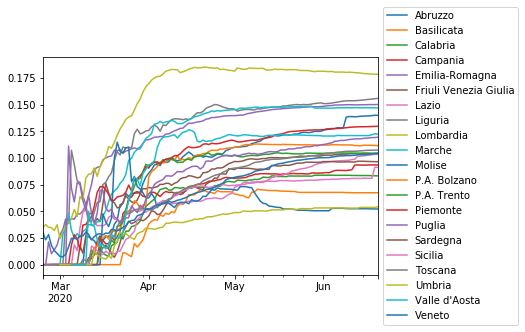

In [172]:
import matplotlib as mpl
%matplotlib inline
letal.plot(legend = False)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [179]:
nreg = len(df.index.get_level_values('denominazione_regione').unique())
nuovi_deceduti = list(np.repeat(np.nan, nreg))
for i in range(nreg, len(df.index)):
    nuovi_deceduti.append(df.iloc[i]['deceduti'] - df.iloc[i-nreg]['deceduti'])

df['nuovi_deceduti'] = nuovi_deceduti

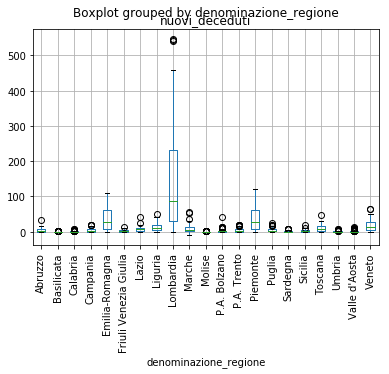

In [180]:
boxplot = df.boxplot(column = 'nuovi_deceduti', by = 'denominazione_regione', rot = 90)


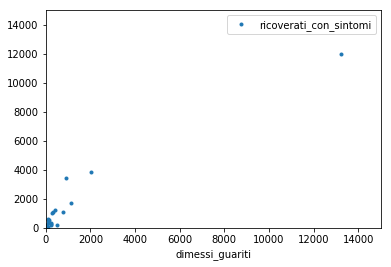

In [6]:
a.plot(x = 'dimessi_guariti', y = 'ricoverati_con_sintomi', style = '.',
       xlim = (0,15000), ylim = (0, 15000))

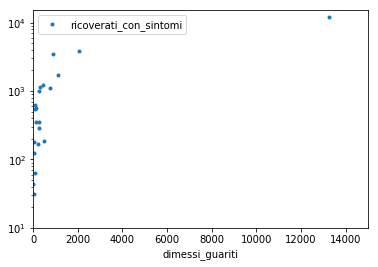

In [10]:
a.plot(x = 'dimessi_guariti', y = 'ricoverati_con_sintomi', style = '.', logy = True,
       xlim = (0,15000), ylim = (10, 15000))